# Data Cleaning and Feature Engineering

__Update the information related to the restaurants business!!!__


__Give a Summary of What have been done in the EDA Process!!!__



* Focus on businesses in the shopping industry which still operate and located in the United States - reduced the number of businesses from 210k to 20k.
* Accordingly, select only the reviews belong to a shopping business - reduced the number of reviews from 8.2m to 485k
* Sample size for the users reduced from ~2m to 277k

# Table of Contents

1. [Import Libraries & Data](#Import-Libraries-&-Data)

    1.1. [Data](#Data)
 

2. [Basic Feature Engineering](#Basic-Feature-Engineering)


3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    3.1. [The Number of Sentences](#The-Number-of-Sentences)
    
    3.2. [The Number of Words](#The-Number-of-Words)
    
    3.3. [The Number of Unique Words](#The-Number-of-Unique-Words)
    
    3.4. [The Number of Punctuations](#The-Number-of-Punctuations)
    
    3.6. [The Number of Exclamation Marks](#The-Number-of-Exclamation-Marks)
    
    3.7. [The Number of Digits](#The-Number-of-Digits)
    
    3.8. [The Number of Dollar Signs](#The-Number-of-Dollar-Signs)
    
    3.9. [The Number of Uppercase Words](#The-Number-of-Uppercase-Words)
    
    3.10. [The Number of Titlecase Words](#The-Number-of-Titlecase-Words)
    
    3.11. [The Number of Letters](#The-Number-of-Lettters)
    
    3.12. [The Average Word Length](#The-Average-Word-Length)
    
    3.13. [Correlation Among The Features](#Correlation-Among-The-Features)
    
    
 4. [Data Cleaning & Text Mining](#Data-Cleaning-&-Text-Mining)
 
    4.1. [Language Detection](#Language-Detection)
    
    4.2. [Businesses with Most Reviews](#Businesses-with-Most-Reviews)
    
    4.3. [Explore the Corpus](#Explore-the-Corpus)
    
    4.4. [Text Mining](#Text-Mining)
    
    4.5. [Text Cleaning](#Text-Cleaning)

# Import Libraries & Data

In [1]:
# import sys
# !{sys.executable} -m pip install textblob
# !{sys.executable} -m pip install googletrans
# !{sys.executable} -m pip install langdetect
# !{sys.executable} -m pip install contractions
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install emoji
# !{sys.executable} -m pip install emot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import contractions
import spacy
import scipy.stats

import nltk
# nltk.download('stopwords', quiet=True)
# nltk.download('punkt', quiet=True)
# nltk.download('crubadan')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer
from string import whitespace, punctuation, digits
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from langdetect import detect

from collections import Counter
from IPython.core.display import display, HTML

stemmer = SnowballStemmer('english')
nlp = spacy.load('en', disable=['parser', 'ner'])
display(HTML('<style>.container { width:90% !important; }</style>'))

In [3]:
# import stopwords as dict
# dict lookup much faster than list look up because of hashing
with open('smart_stopwords.txt', 'r') as fin:
    stop_words = {word.strip() : None for word in fin.readlines()}

In [4]:
# # https://github.com/dwyl/english-words
# with open('english_words.txt', 'r') as fin:
#     english_words = {word.strip(): None for word in fin.readlines()}

## Data

In [5]:
df = pd.read_csv('yelp_review_data.csv')
df.head()

,review_id,user_id,business_id,review_stars,review_useful,review_funny,review_cool,review,review_date
0,2TtLt9skrBwBM6QGEhFYCg,eSQ3z93DlzkpXK_H6MFEMw,pQeaRpvuhoEqudo3uymHIQ,5.0,0,0,0,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15
1,G16jgK2n4QgEfAr4YIs0iA,5So3uZiWDmow4eG8Va0WhQ,pQeaRpvuhoEqudo3uymHIQ,5.0,0,0,0,I ordered feta cheese and spinach empanadas an...,2017-09-21 17:45:53
2,EHZ9uJhGt3H3XVuR_G_ysA,Oh1CPqH5zBZfDEC_2ueTow,pQeaRpvuhoEqudo3uymHIQ,2.0,0,0,0,I went to the place on Green St today. I went ...,2014-10-07 01:07:00
3,sO9ujibiSiQeiHYNpuER8w,vtqj_61x-cpLjrj1dBQTjQ,pQeaRpvuhoEqudo3uymHIQ,5.0,1,0,0,These empanadas are excellent- we are Argentin...,2013-07-10 18:26:33
4,-xl-rka_yUUFVdLJsfPi4A,aVWzh3hpLVUSVWSds75Sig,pQeaRpvuhoEqudo3uymHIQ,5.0,0,0,0,These empanadas are HUGE and in my opinion bet...,2019-05-07 03:12:10


In [6]:
# check if there is duplicated reviews
print("""
        Numbers about the restaurants reviews:
            
            * {:,} reviews
            * {:,} users
            * {:,} businesses.
                
        However, {:,} reviews are duplicated and will be dropped from the data.
      """
      .format(df.shape[0],
              df.user_id.unique().shape[0],
              df.business_id.unique().shape[0],
              df[df.review.duplicated()].shape[0]))


        Numbers about the restaurants reviews:
            
            * 3,487,937 reviews
            * 1,116,634 users
            * 25,827 businesses.
                
        However, 9,073 reviews are duplicated and will be dropped from the data.
      


In [7]:
# drop duplicated reviews
df.drop_duplicates(subset='review', keep='first', inplace=True)

In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3478864 entries, 0 to 3487936
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   review_id      3478864 non-null  object 
 1   user_id        3478864 non-null  object 
 2   business_id    3478864 non-null  object 
 3   review_stars   3478864 non-null  float64
 4   review_useful  3478864 non-null  int64  
 5   review_funny   3478864 non-null  int64  
 6   review_cool    3478864 non-null  int64  
 7   review         3478863 non-null  object 
 8   review_date    3478864 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 265.4+ MB


In [9]:
# There is one null value in the reviews
df = df.loc[df.review.notnull()]

# Basic Feature Engineering

* In this stage, we will focus on the basic text features.
* We will compute the following features for each document in the corpus.


    1. Number of Sentences
    2. Number of Words
    3. Number of Unique Words
    4. Number of Punctuations
    5. Number of Exclamation Marks
    6. Number of Digits
    7. Number of Dollar Sign
    8. Number of Stop Words
    9. Number of Uppercase Words
    10. Number of Titlecase Words
    11. Number of Letters
    12. Average Word Length

In [10]:
# tokenize reviews
df['word_tokens'] = df.review.apply(nltk.word_tokenize)

In [11]:
# Feature engineering
df['length_sent'] = df.review.apply(lambda x: len(nltk.sent_tokenize(x)))
df['length_word'] = df.word_tokens.apply(lambda x: len(x))
df['set_word'] = df.word_tokens.apply(
    lambda x: len(set([w.lower() for w in x])))
df['length_punct'] = df.review.apply(
    lambda x: len([p for p in x if p in punctuation]))
df['length_exclamation'] = df.review.apply(
    lambda x: len([p for p in x if p == '!']))
df['length_digits'] = df.review.apply(
    lambda x: len([d for d in x if d in digits]))
df['length_dollar'] = df.review.apply(
    lambda x: len([char for char in x if char == '$']))
df['length_stopwords'] = df.word_tokens.apply(
    lambda x: len([w for w in x if w.lower() in stop_words]))
df['length_upper'] = df.word_tokens.apply(
    lambda x: len([w for w in x if w.isupper()]))
df['length_title'] = df.word_tokens.apply(
    lambda x: len([w for w in x if w.istitle()]))
df['length_char'] = df.review.apply(lambda x: len(
    [char for char in x if char not in punctuation + whitespace + digits]))
df['average_length_words'] = df.word_tokens.apply(
    lambda x: np.mean([len(w) for w in x]))

# Exploratory Data Analysis

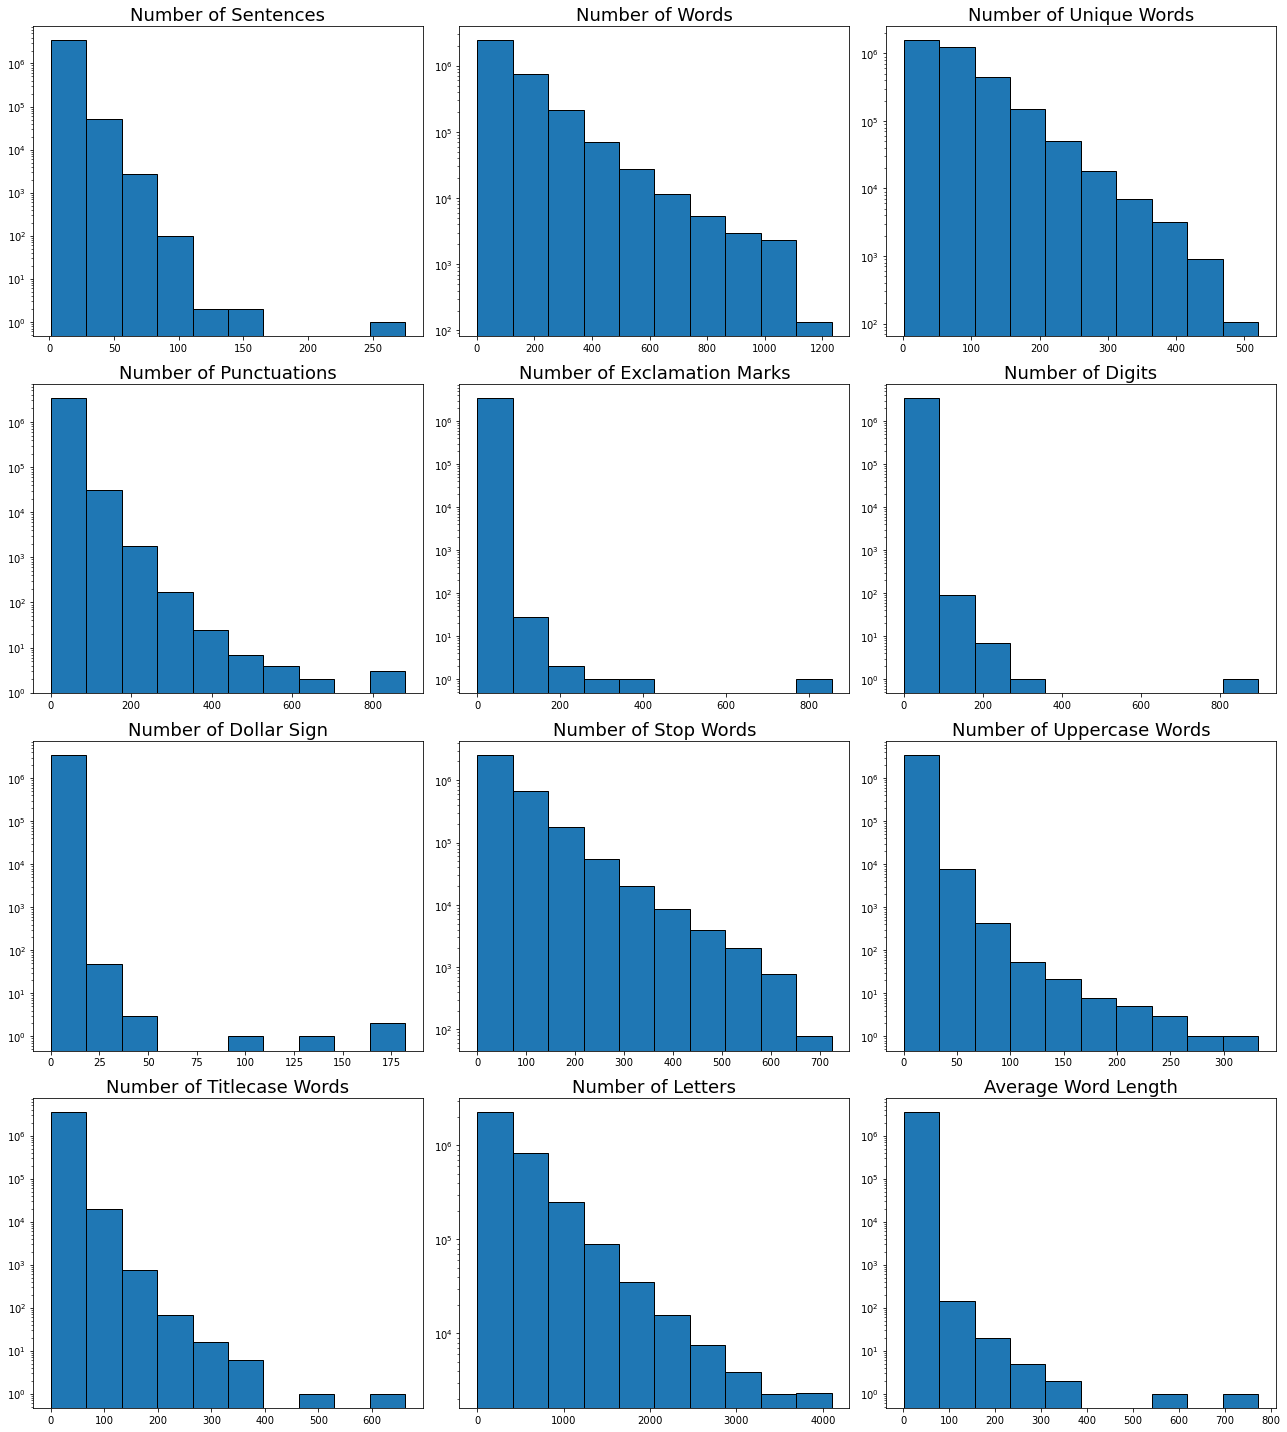

In [12]:
features = ['length_sent', 'length_word', 'set_word', 'length_punct',
            'length_exclamation', 'length_digits', 'length_dollar',
            'length_stopwords', 'length_upper', 'length_title', 'length_char',
            'average_length_words']
titles = ['Number of Sentences', 'Number of Words', 'Number of Unique Words',
          'Number of Punctuations', 'Number of Exclamation Marks',
          'Number of Digits', 'Number of Dollar Sign', 'Number of Stop Words',
          'Number of Uppercase Words', 'Number of Titlecase Words',
          'Number of Letters', 'Average Word Length']
d = dict(list(zip(features, titles)))
fig, axes = plt.subplots(4, 3)  # generates figure and axis objects
fig.set_size_inches([18, 20])  # adjust the figure size in inches
axes = axes.flatten()
for feature, ax in zip(list(d.keys()), axes):
    ax.hist(df[feature].values, edgecolor='k')
    ax.set_yscale('log')
    ax.set_title(d[feature], size=18)
plt.tight_layout()
plt.show()

* The histograms are log-scaled in order to see extreme values.
* __Average Word Length__ and __Number of Punctuations__ have suspicious values.
* Moreover, there are extreme values in each feature. We will check them in the next section.

## The Number of Sentences

In [13]:
# each dot counted as a separate sentence
print(df[df.length_sent == df.length_sent.max()].review.values[0])

Ugh.  I have so much to say about this place.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot wings. Hot wings.  Hot win

## The Number of Words

In [14]:
# check if anything wrong with the review
print(df[df.length_word == df.length_word.max()].review.values[0])

(aka. SKETCHY TEMPE with BONNIE G, Part Three of Three)

SET-UP: Bonnie G and Mr K walk up to the Palo Verde Lounge, a tiny run-down box nestled in the armpit of Broadway, gleaming in the diviest of glories. The outside light may as well have been flickering (but it wasn't). 

BONNIE G:  "So, Mr K, what do you think? Isn't it all you ever dreamed about? You know it is." 

ACTION: Mr K stands there for a second and takes in the aura. It is what he always dreamed about. 

MR: "Hell yeah. Let's do it." 

ACTION: Bonnie G smiles. They walk in.

SCENE: Small place. Like a shoebox. A very divey shoebox which may have seen better days. Or perhaps each of its days has always been this way. Pool table to the left. Bar to the right. Graffiti this way and that. Some palpable decrepitation. Behind the bar, a microwave. Stale scent of lingering smoke of many years still permeates. Faint scent of other odors, too. Some hipsters milling about, doing whatever it is hipsters do. Others of a more miscre

## The Number of Unique Words

In [15]:
t = df[df.set_word == df.set_word.max()].review.values
print(t[0])

When a restaurant's most interesting offering is a burger, and it's not a a place that specializes in them, a reviewer is tempted to lop off at least one or two stars or avoid them completely, but in this case, doing either would be a grave error. Ten Penny's eponymous burger is worth paying to park in a garage for. 

Fortunately for us one lazy, culinarily-challenged weeknight after work, Kay and I happened to be within reasonable walking distance from her employer's complimentary lot. I'd remembered that Ten Penny was a new competitor in the Downtown Pittsburgh dining scene and convinced my significant other to make the trek, but that's not important. Let's discuss the burger. 

I didn't want to order one (I go to burgers too often), but the other entrees just weren't quite piquing my interest. Besides, working in a physical job gives a guy a craving for the glorified steaks, and this was not only glorified, it was rarefied, literally and figuratively. 

Let's muse about the doneness

## The Number of Punctuations

In [16]:
t = df[df.length_punct == df.length_punct.max()].review.values
print(t[0])

If.....you......want.....to.....get.....a......good......meal.....in......a........reasonable.......amount.........of......time.......then.......you.......should.......probably........look.......elsewhere.......this........restaurant........needs.......some........serious.....help.....there........are......dishes.......everywhere......servers......do.......not.......pick......up......plates.....from......tables.......it.......takes......forever.....to......get.......food.......and.......when......you......do......it.......is......usually.......luke.......warm.....I........imagine.......if.......you.....just......want......to......drink......beers.......it......would......be......fine.......but.......be.......prepared......to......wait............................forever....................to......................get.................................your........................food.....................because......................there..............................................is......

## The Number of Exclamation Marks

In [17]:
print(df[df.length_exclamation == df.length_exclamation.max()].review.values[0])

This is the freaking worst restaurant delivery ever!!!!!!!!!!!
I just called 9 times and they hung up every single time.  Literally picked up the phone and hung up.  WHO IS THE OWNER?!?!? Whoever the owner is needs to NEVER BE IN CHARGE OF ANY BUSINESS EVER!!!! The business practices here are the worst ever! I mean EVER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!!!!

## The Number of Digits

In [18]:
print(df[df.length_digits == df.length_digits.max()].review.values[0])

I give it a star rating of 3.141592653589793238462643383279502884197169399375105820974944592307816406286 208998628034825342117067982148086513282306647093844609550582231725359408128481 117450284102701938521105559644622948954930381964428810975665933446128475648233 786783165271201909145648566923460348610454326648213393607260249141273724587006 606315588174881520920962829254091715364367892590360011330530548820466521384146 951941511609433057270365759591953092186117381932611793105118548074462379962749 567351885752724891227938183011949129833673362440656643086021394946395224737190 702179860943702770539217176293176752384674818467669405132000568127145263560827 139239410001620769363684677641301781965937997155746854194633489374843912974239 143365936041003523437770658886778113949861647874714079326385873862473288964564 359877466763847946650407411182565837887845485814896296127399841344272608606187 2455452360643153710112746809778704464094

Oh, shit.  Wrong 'pi'


## The Number of Dollar Signs

In [19]:
print(df[df.length_dollar == df.length_dollar.max()].review.values[0])

____________________________________________
                                         $ $ $
                                         $ $ $
                                         $ $ $
                                 $$$ $ $ $$ $$
                                    $$$ $$$ $
                                         $ $$
                                           $
              _______________       $slots$_____________
     __$$$$_______$$$___$ufc$________
     _$21$$$_____$$$___$$$$$$$_______
     $$$_$fun$___$$$__$$$$____$_______
     $____$$$$_$$$$_$$$______________
     _______$$$$$alcohol___$$$$$_______
     ____$beach$$$$$$_$$$$_$spa$_____
     ___$$rum$$$$jungle$_____$$$____
     __$$$__$$$$$$(*)(*)$$_______$____
     _$$___$$poker$$sin$$$$_________
     $$___$$$$_$$$$_$$$__$$$$$________
     $___$$$$___^^__$$$$___ $$$_______
     ____sex_____^^^___y$$____$$______
     ____$$______ ^^^^___$$$____$______
     ____$$_______^^^^____$$___________
     ____$________^s^____$$_____

## The Number of Stop Words

In [20]:
print(df[df.length_stopwords == df.length_stopwords.max()].review.values[0])

If i could i would give this place a negative star rating!!!!
Found this place on booking.com decided to give it try from the pictures everything looks great. But pictures can be deceiving! I would upload mine but I cant since my Phone was stole from my room!!!

Heres the Story on how my phone got stole from my room.
We check in Friday evening around 4:30ish pm. Everything was great! We had to pull around to the back of the hotel because it was closest to our room... When we did there was a car pulled over with a man pissing in plain site... that was strike 1. We go settled in and later that night when we got back to our room around 11 or so i went to try on the tv in the room and it did not work so I call the front desk and they sent over the Security Guard!? with was weird... He wasn't able to get the tv to work.. strike... about an 1/2 hour after he left there was a weird long beep like an alarm that had went off for about 1 minute... didn't know where the noises was coming from i t

## The Number of Uppercase Words

In [21]:
print(df[df.length_upper == df.length_upper.max()].review.values[0])

I live here in Providence, and was actually online to see if anyone knew when the new Cafe was opening, as my husband is a brekfast person , and was SHOCKED to see some of the people writing awful reviews about Jims Pizza. I am not a YELPER like many of you are, as I have a busy schedule, being that my husband and I own ourselves 3 local business' in town, but I was so saddened to see what people were writing about this great place, I had to give my two cents.

To start, my family, especially my teenager and her friends have ordered Jims Pizza many times, and it is fantastic!  Always tastes fresh, crust is amazing, and it gets to our door of hungry teenagers fast.  Maybe the people complaining about Jims Pizza, are just use to eating junk food and the "fast food craze" and just got used to eating the cheap tasting pizza from places like Dominos and Pizza Hut, and their taste buds just cant realize what good pizza tastes like anymore, as Jims Pizza is great.  I always got great, friendl

## The Number of Titlecase Words

In [22]:
print(df[df.length_title == df.length_title.max()].review.values[0])

We Have Been Regulars at Several Outbacks Usually By Where We Live. For Years Went ATO Scottsdale Location Because it Was Near The Harkins There. Never Had a Problem. Then We Moved & We Were Near PV Mall & There is A Outback There. Never Had A Problem There. Now for this Location..We Moved to Tempe 2 Years Ago. (Downsized To Save for Retirement ) Regardless We Tried The Tempe Location on Southern & We Have Had A  Few Little Issues Nothing Huge Steak Over Cooked Once Another Time Under Cooked They're Good About Making it Right. This last Visit However We Were Hugely Disappointed. Went For Steak Lobster Special Menu Pricing Not The Same As National Ad. Sorry But That Just Stinks. Outback Needs 2 Honor The Price Or Print A Disclaimer On Menu. **We Are A Franchise So Therefore We Charge You More**. I Think That's Sad. We Ordered As We've had Decent Meals On This Special In Vegas on Strip Was Excellent. ( For Years ) Must Be A Company Store As Meals Were Consistent!! My husband Ordered The 

## The Number of Letters

In [23]:
print(df[df.length_char == df.length_char.max()].review.values[0])

Shortly after opening in January of 2015 it was obvious to anyone with any dining experience that Bardot Brasserie had a ton of potential, the space itself a gorgeous renovation from the eye-catching bar right down to the Brasserie-detailed plates and Chef Josh Smith, showing lots of skill across a menu of French Classics featuring good technique and just enough whimsy to keep things interesting

Immediately supplanting Bouchon as the best mid-priced French Restaurant in town and later taking home a James Beard Foundation semi-finalist nod for Best New Restaurant, an award later won by New York's Le Coucou which features neither equivalent French Cuisine nor quality of design, it was nevertheless that the Michael Mina space on Aria's 2nd floor continued to evolve, even launching sister Margeaux Brasserie in Chicago earlier this year

Now approaching year number three and still doing good business, the menu having born several signatures but continuing to evolve with each new season in 

## The Average Word Length

In [24]:
df[df.average_length_words > 20].loc[:, ['review', 'average_length_words']].head()

,review,average_length_words
11146,フェニックス(地元の発音では、フィーニックス)のスカイハーバー国際空港の４番ターミナルにあり...,25.625
19091,ここもレストランではなく、先にカウンターで注文するファストフード店です。\nフォーなどが食べ...,48.800
20006,南部的なフライドチキンが楽しめる全国チェーン。チキンのからあげ等が大好きな日本人にとって、思...,124.000
26676,店員さんがフレンドリー！\n味も美味しくディナーと次の日のランチも来てしまいました\nディナ...,21.000
32981,好吃好吃好吃好吃好吃好吃好吃好吃好吃今天和我男朋友一起来吃面，好吃好吃好吃好吃我写了那么长了...,92.000


* Reviews with higher average length word is tend to belong to another language
* Let's detect the language of each review and keep only English

## Correlation Among The Features

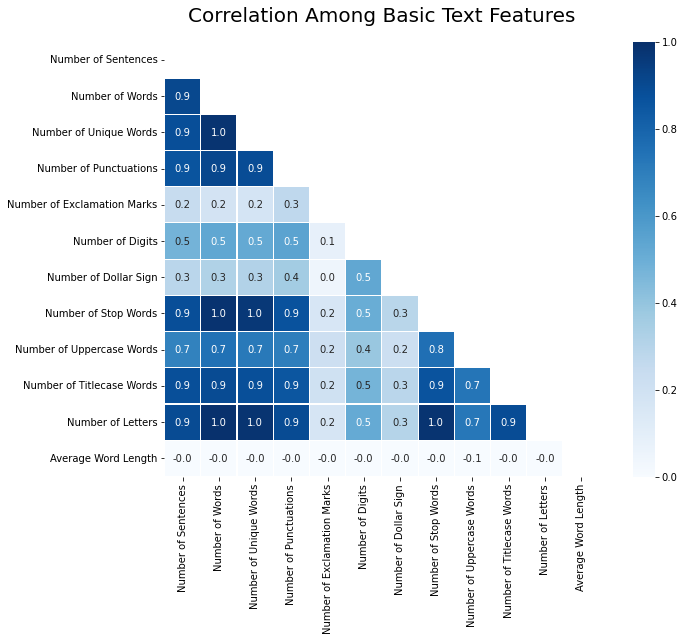

In [25]:
corr = df.loc[:, [
    'length_sent', 'length_word', 'set_word', 'length_punct',
    'length_exclamation', 'length_digits', 'length_dollar',
    'length_stopwords', 'length_upper', 'length_title', 'length_char',
    'average_length_words']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True  # shows only the left lower triangle

fig, ax = plt.subplots()  # generates ax and figure object
fig.set_size_inches([12, 8])  # set the figure sizes in inches
# plots the heatmap
sns.heatmap(corr,
            mask=mask,
            vmin=0,
            vmax=1,
            linewidth=0.2,
            square=True,
            cmap='Blues',
            annot=True,
            fmt='.1f',
            ax=ax)
ax.set_yticklabels(titles, rotation=0, fontsize="10", va="center")
ax.set_xticklabels(titles)
# set title for the figure
ax.set_title('Correlation Among Basic Text Features', size=20, pad=20)
# shows the plot
plt.show()

## The Features and The Target Variable

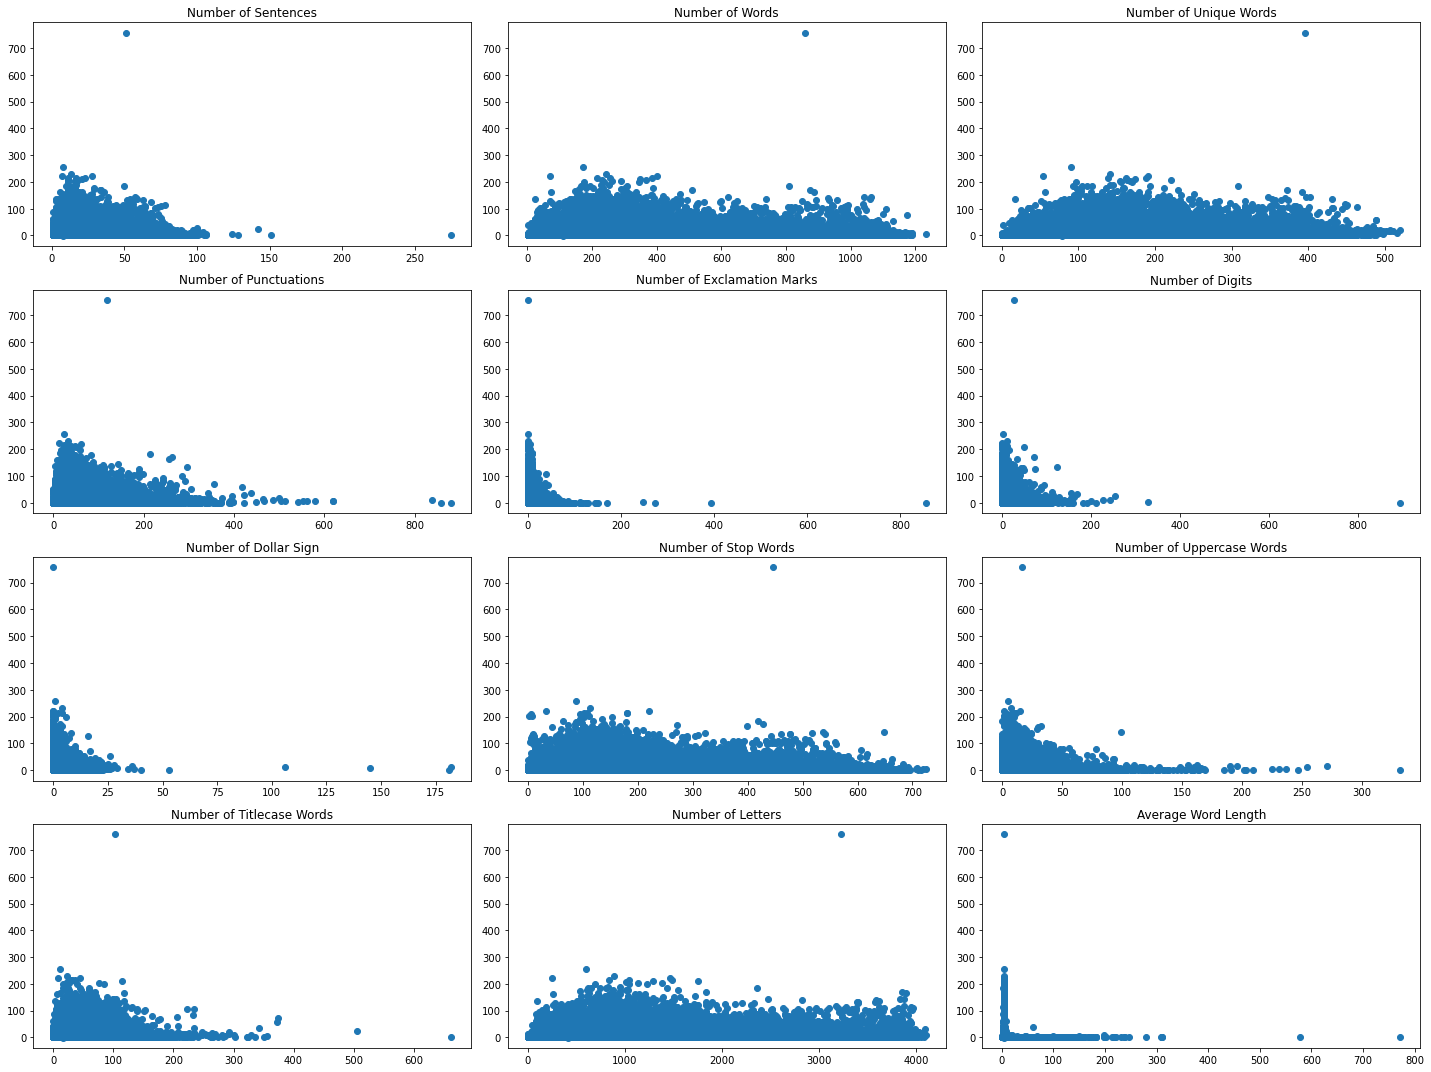

In [26]:
# scatter plot of each feature with helpful votes
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()
for ax, feature, title in zip(axes, features, titles):
    ax.scatter(df[feature].values, df.review_useful.values)
    ax.set_title(title)
plt.tight_layout()
plt.show()

In [27]:
print("""
        The outlier point for the most helpful votes (target variable) is {:,}. 
        Outliers may hinder the true relationship between features and helpful votes.
        Generate a new data without outliers (eyeballing) in order to observe any
        difference in the relationship between features and the target variable.
      """
      .format(df.review_useful.max()))


        The outlier point for the most helpful votes (target variable) is 758. 
        Outliers may hinder the true relationship between features and helpful votes.
        Generate a new data without outliers (eyeballing) in order to observe any
        difference in the relationship between features and the target variable.
      


In [28]:
# Generate a temproary data file without outliers
# Outliers detected eyeballindf_noOutliersOutliersot a solid way
# Reason is to try to see the true relationship between featuers and helpful votes
df_noOutliers = df.loc[df.review_useful < 700, :]
df_noOutliers = df_noOutliers.loc[df_noOutliers.length_sent < 120, :]
df_noOutliers = df_noOutliers.loc[df_noOutliers.length_punct < 500, :]
df_noOutliers = df_noOutliers.loc[df_noOutliers.length_upper < 175, :]
df_noOutliers = df_noOutliers.loc[df_noOutliers.length_title < 300, :]
df_noOutliers = df_noOutliers.loc[df_noOutliers.average_length_words < 10, :]
df_noOutliers = df_noOutliers.loc[df_noOutliers.length_dollar < 30, :]
df_noOutliers = df_noOutliers.loc[df_noOutliers.length_exclamation < 200, :]
df_noOutliers = df_noOutliers.loc[df_noOutliers.length_digits < 190, :]

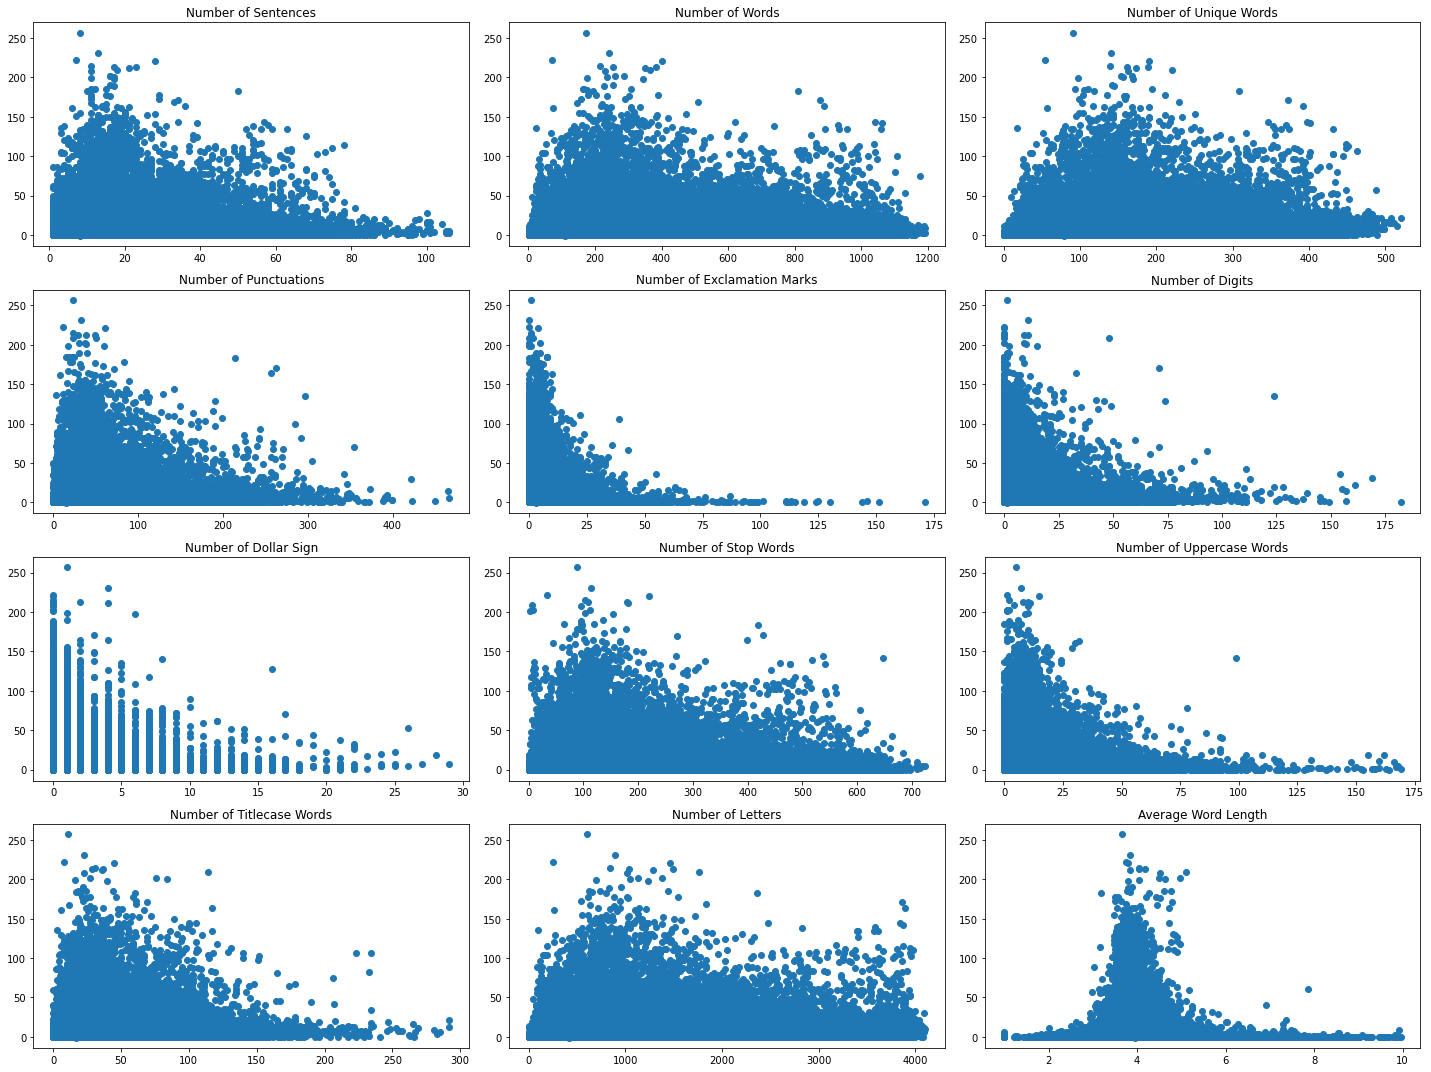

In [29]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()
for ax, feature, title in zip(axes, features, titles):
    ax.scatter(df_noOutliers[feature].values,
               df_noOutliers.review_useful.values)
    ax.set_title(title)
plt.tight_layout()
plt.show()

In [30]:
pd.DataFrame({'Helpful Votes - Outliers':
              [scipy.stats.pearsonr(df[feature].values,
                                    df.review_useful.values)[0] 
                   for feature in features],
              'Helpful Votes - NoOutliers':
              [scipy.stats.pearsonr(df_noOutliers[feature].values,
                                    df_noOutliers.review_useful.values)[0]
                   for feature in features]},
             index=titles)

,Helpful Votes - Outliers,Helpful Votes - NoOutliers
Number of Sentences,NaN,0.266259
Number of Words,0.279573,0.281358
Number of Unique Words,0.285823,0.287694
Number of Punctuations,0.278014,0.280379
Number of Exclamation Marks,0.064670,0.066640
Number of Digits,0.162068,0.164860
Number of Dollar Sign,0.118524,0.123075
Number of Stop Words,0.260187,0.261895
Number of Uppercase Words,0.205789,0.207940
Number of Titlecase Words,0.292244,0.294231


In [31]:
# del dfNoOutliers in order to free up memory
del df_noOutliers

# Data Cleaning & Text Mining

* As seen from the average word length feature, there are reviews that are not written in English.
* We will use a language detection algorithm in order to identify English reviews.

## Language Detection

In [32]:
def get_language(text):
    try:
        return detect(text)
    except:
        return 'error'

In [33]:
df['language'] = df.review.apply(get_language)
df.to_csv('yelp_reviews_with_language.csv', index=False)

In [34]:
# language detection algorithm takes a great amount of time 
# save data as csv in order to save time from language detection
# df = pd.read_csv('yelp_reviews_with_language.csv')

In [35]:
print()
print('\t{:<10}\t{:<10}'.format('Language', 'Count'))
for lang, count in df.language.value_counts().to_dict().items():
    print('\t{:<10}\t{:<10,}'.format(lang, count))
print()


	Language  	Count     
	en        	3,473,105 
	es        	2,533     
	de        	734       
	fr        	450       
	ja        	332       
	it        	256       
	zh-cn     	223       
	zh-tw     	135       
	nl        	133       
	ko        	130       
	af        	113       
	pt        	108       
	da        	103       
	no        	65        
	so        	53        
	ca        	51        
	sv        	46        
	cy        	37        
	ro        	34        
	tl        	32        
	et        	30        
	tr        	23        
	id        	23        
	hr        	16        
	pl        	15        
	vi        	15        
	fi        	12        
	error     	12        
	sl        	11        
	sk        	9         
	cs        	7         
	sw        	6         
	sq        	5         
	hu        	4         
	lt        	2         



In [36]:
# keep only English reviews
df = df.loc[df.language == 'en']

## Businesses with Most Reviews

* After we identified all English reviews, we will focus on a specific part of the data.
* In order to keep data more relevant to the restaurants industry, we will focus on the businesses which have more than 1000 reviews.
* Since Yelp industry categorization is not mutually exclusive, there are businesses from other industries that are also categorized as restaurants for some reason.
* By focusing on business that have more than 1000 reviews, we believe that the sample will consist of more restaurant businesses.
* Finally, this kind of approach may result more homogeneous corpus which may improve the model performance.

In [37]:
# group reviews by business id
review_count = df.loc[:, ['business_id', 'review_id']].groupby(
    'business_id').count().rename(
    columns={'review_id': 'review_count'}).sort_values(
    'review_count', ascending=False).reset_index()

In [38]:
display(review_count.head())

,business_id,review_count
0,RESDUcs7fIiihp38-d6_6g,10349
1,4JNXUYY8wbaaDmk3BPzlWw,9467
2,K7lWdNUhCbcnEvI0NhGewg,7567
3,f4x1YBxkLrZg652xt2KR5g,6827
4,DkYS3arLOhA8si5uUEmHOw,5346


In [39]:
review_threshold = 1000
print("""
        There are {:,} unique businesses with a total of {:,} customer reviews.
        Only {:,} of businesses have more than {} customer reviews.
        The average number of review per business is {:.2f} for those that have
        more than {:,} reviews. However, the average number of review per business
        is {:.2f} for the remaining ones.
        Finally, {:,} businesses have less than 10 customer reviews.
        
      """
      .format(review_count.shape[0],
              review_count.review_count.sum(),
              review_count[review_count.review_count >=
                           review_threshold].shape[0],
              review_threshold,
              review_count[
                  review_count.review_count >= review_threshold].mean()[0],
              review_threshold,
              review_count[
                  review_count.review_count < review_threshold].mean()[0],
              review_count[
                  review_count.review_count < 10].shape[0]))


        There are 25,827 unique businesses with a total of 3,473,105 customer reviews.
        Only 411 of businesses have more than 1000 customer reviews.
        The average number of review per business is 1782.39 for those that have
        more than 1,000 reviews. However, the average number of review per business
        is 107.83 for the remaining ones.
        Finally, 4,047 businesses have less than 10 customer reviews.
        
      


In [40]:
# identify all businesses which have more than 1000 reviews
review_count = review_count.loc[review_count.review_count >= review_threshold]
# keep only the business ids
review_count.drop('review_count', axis=1, inplace=True)
# merge on business id
df1 = df.merge(review_count, on='business_id', validate='many_to_one')

In [41]:
df1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732564 entries, 0 to 732563
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_id             732564 non-null  object 
 1   user_id               732564 non-null  object 
 2   business_id           732564 non-null  object 
 3   review_stars          732564 non-null  float64
 4   review_useful         732564 non-null  int64  
 5   review_funny          732564 non-null  int64  
 6   review_cool           732564 non-null  int64  
 7   review                732564 non-null  object 
 8   review_date           732564 non-null  object 
 9   word_tokens           732564 non-null  object 
 10  length_sent           732564 non-null  int64  
 11  length_word           732564 non-null  int64  
 12  set_word              732564 non-null  int64  
 13  length_punct          732564 non-null  int64  
 14  length_exclamation    732564 non-null  int64  
 15  

## Explore the Corpus

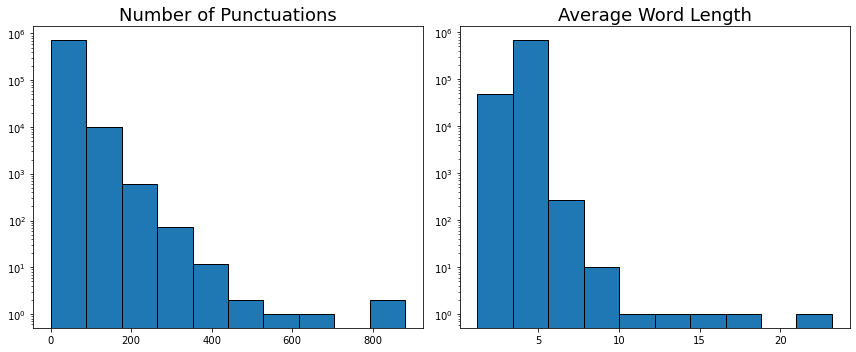

In [42]:
# Check some features in order to explore the corpus
d = dict(zip(['length_punct', 'average_length_words'],
             ['Number of Punctuations', 'Average Word Length']))
# compare distributions of features by class in order to find the
# features that can identify fraudulent transactions
fig, axes = plt.subplots(1, 2)  # generates figure and axis objects
fig.set_size_inches([12, 5])  # adjust the figure size in inches
axes = axes.flatten()
for feature, ax in zip(d.keys(), axes):
    # plot the distribution of not helpful
    ax.hist(df1[feature].values, edgecolor='k')
    ax.set_yscale('log')
    ax.set_title(d[feature], size=18)
plt.tight_layout()
plt.show()

In [43]:
# All reviews which have average word length greater than 6 characters
# In English, the average word length stays between 5 and 6.
for review in df1[df1.average_length_words > 6].review.values:
    print(review)
    print('-+' * 80, end='\n\n')

awesome sushi restaurant and very cheap price
have to visit in las vegas！！！xkxdmdkskkakakdmfkslfkfms
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

first day in las vagas and taste nice sushi～～～great environment，great food～great stuff～～
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

very nice place for meeting friends。Beautiful services. Wonderful tasting.coming for dinner
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Delicious!
Speedy
Friendly

Highly recommend this place 

Alligator and Lobster rolls were fantastic
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

* As seen above, `http` and `https` links change the average length of word feature, dramatically.
* Also, there are a lot of words with repeated character in great numbers.
* Manual check after language detection may be required.
* URLs and consecutive punctuations inflated __Average Length of Words__ and __Number of Punctuation__

## Text Mining

* In this section, we will extract additional features from the text.

    1. The number of Photos in each review
    2. The number of URLs in each review
    3. The number of Time-related information in each review
    4. The number of Emoticons in each review
     

In [44]:
def find_photos(text):
    biz_photo = re.compile(r'https?:\/\/www\.yelp\.com\/biz_photos\/\S+')
    user_photo = re.compile(r'https?:\/\/www.yelp.com\/user_local_photos\?\S+')
    text = biz_photo.sub(r' PHOTOEMBEDDED ', text)
    return user_photo.sub(r' PHOTOEMBEDDED ', text)

In [45]:
def find_URLs(text):
    url = re.compile(r'https?:\/\/\S+|www\.\S+')
    return url.sub(r' URLEMBEDDED ', text)

In [46]:
def find_price(text):
    price1 = re.compile(r'[$€£¥]\d+|[$€£¥]\ +\d+\.?\d+')
    price2 = re.compile(r'\d+? ?dollars?|\d+\.?\d+ ?dollars?')
    text = price1.sub(r' PRICEEMBEDDED ', text)
    return price2.sub(r' PRICEEMBEDDED ', text)

In [47]:
def find_time(text):
    time1 = re.compile(
        r'\d+? +?(mnt|minute|min|hour|hr|seconds|a.?m.?|p.?m.?)[a-z]?')
    time2 = re.compile(r'\b\d{1,2}:\d{1,2}\b')
    text = time1.sub(r' TIMEEMBEDDED ', text)
    return time2.sub(r' TIMEEMBEDDED ', text)

In [48]:
def find_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', r'  EMOTICONFOUND  ', text)
    return text

In [49]:
# find photos
df1['review_clean'] = df1.review.apply(find_photos)
df1['number_of_photos'] = df1.review_clean.apply(
    lambda x: x.count('PHOTOEMBEDDED'))

In [50]:
# find URLs
df1.review_clean = df1.review_clean.apply(find_URLs)
df1['number_of_urls'] = df1.review_clean.apply(
    lambda x: x.count('URLEMBEDDED'))

In [51]:
# find price
df1.review_clean = df1.review_clean.apply(find_price)
df1['number_of_price'] = df1.review_clean.apply(
    lambda x: x.count('PRICEEMBEDDED'))

In [52]:
# find time
df1.review_clean = df1.review_clean.apply(find_time)
df1['number_of_time'] = df1.review_clean.apply(
    lambda x: x.count('TIMEEMBEDDED'))

In [53]:
# It is important to extract the number of emoticons after extracting the number
# of time-related information. Because, some time-related information can be
# confused with emoticons such as '09:30 a.m.' can be counted as an emoticon since
# ':3' is in the time-related information.
# find emoticons
df1['number_of_emots'] = df1.review_clean.apply(
    find_emoticons).apply(lambda x: x.count('EMOTICONFOUND'))

In [54]:
print("""
        The correlation between the number of items and  helpful votes:
        
            {:<10}\t{:>10}\t{:>10}
            {:<10}\t{:>9.2f}\t{:>9.2f}
            {:<10}\t{:>9.2f}\t{:>9.2f}
            {:<10}\t{:>9.2f}\t{:>9.2f}
            {:<10}\t{:>9.2f}\t{:>9.2f}
            {:<10}\t{:>9.2f}\t{:>9.2f}
      """.format(
    'Feature', 'Pearson R', 'Significance',
    'PHOTO',
    scipy.stats.pearsonr(df1.number_of_photos, df1.review_useful.values)[0],
    scipy.stats.pearsonr(df1.number_of_photos, df1.review_useful.values)[1],
    'URL',
    scipy.stats.pearsonr(df1.number_of_urls, df1.review_useful.values)[0],
    scipy.stats.pearsonr(df1.number_of_urls, df1.review_useful.values)[1],
    'PRICE',
    scipy.stats.pearsonr(df1.number_of_price, df1.review_useful.values)[0],
    scipy.stats.pearsonr(df1.number_of_price, df1.review_useful.values)[1],
    'TIME',
    scipy.stats.pearsonr(df1.number_of_time, df1.review_useful.values)[0],
    scipy.stats.pearsonr(df1.number_of_time, df1.review_useful.values)[1],
    'EMOTICON',
    scipy.stats.pearsonr(df1.number_of_emots, df1.review_useful.values)[0],
    scipy.stats.pearsonr(df1.number_of_emots, df1.review_useful.values)[1]))


        The correlation between the number of items and  helpful votes:
        
            Feature   	 Pearson R	Significance
            PHOTO     	     0.07	     0.00
            URL       	     0.05	     0.00
            PRICE     	     0.13	     0.00
            TIME      	     0.07	     0.00
            EMOTICON  	     0.16	     0.00
      


## Text Cleaning

In [55]:
def remove_chinese_characters(text):
    chinese_characters = re.compile("["
                                       u"\u2E80-\u2FD5"
                                       u"\u3190-\u319f"
                                       u"\u3400-\u4DBF"
                                       u"\u4E00-\u9FCC"
                                       u"\uF900-\uFAAD"
                                    "]+", flags=re.UNICODE)
    return chinese_characters.sub(r' ', text)   

In [56]:
def remove_japanese_characters(text):
    japanese_characters = re.compile("["
                                        u"\u3000-\u303f"
                                        u"\u3040-\u309f"
                                        u"\u30a0-\u30ff"
                                        u"\uff00-\uffef"
                                        u"\u4e00-\u9faf"
                                     "]+", flags=re.UNICODE)
    return japanese_characters.sub(r' ', text)

In [57]:
def clean_whitespace(text):
    white_space = re.compile(r'\s+')
    return white_space.sub(r' ', text)

In [58]:
def reduce_duplicated_chars(text):
    duplicated_chars = re.compile(r'(\w)\1{2,}')
    return duplicated_chars.sub(r'\1', text)

In [59]:
def replace_spaced_letters(text):
    spaced_words = re.compile(r'\b([A-Z]\s+?){3,}[A-Z]?\b')
    iterator = spaced_words.finditer(text)
    for match in iterator:
        start, stop = match.span()
        word = text[start:stop]
        word = word.replace(' ', '')
        text = re.sub(spaced_words, word, text)
    return text

In [60]:
def remove_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, r' ')
    return text

In [61]:
def clean_review(text):
    text = text.replace('EMOTICONFOUND', ' ')
    text = text.replace('PHOTOEMBEDDED', ' ')
    text = text.replace('URLEMBEDDED', ' ')
    text = text.replace('PRICEEMBEDDED', ' ')
    text = text.replace('TIMEEMBEDDED', ' ')
    return text

In [62]:
def remove_punctuations(text):
    punct = re.compile(r'[^\w\s]')
    return punct.sub(r' ', text)

In [63]:
# remove chinese and japanese characters
df1.review_clean = df1.review_clean.apply(remove_chinese_characters)
df1.review_clean = df1.review_clean.apply(remove_japanese_characters)

In [64]:
# reduce multiple whitespaces into one
df1.review_clean = df1.review_clean.apply(clean_whitespace)

In [65]:
# reduce repeated characters such as soooooooooooo -> so
df1.review_clean = df1.review_clean.apply(reduce_duplicated_chars)

In [66]:
# find spaced letters such as A M A Z I N G -> AMAZING
df1.review_clean = df1.review_clean.apply(replace_spaced_letters)

In [67]:
# fix contractions such as I'm -> I am
df1.review_clean = df1.review_clean.apply(contractions.fix)

In [68]:
# lowercase reviews
df1.review_clean = df1.review_clean.apply(
    lambda x: ' '.join([w.lower() for w in x.split()]))

In [69]:
# clean reviews
df1.review_clean = df1.review_clean.apply(clean_review)

In [70]:
# remove emojis
df1.review_clean = df1.review_clean.apply(remove_emojis)

In [71]:
# separate hyphen words
df1.review_clean = df1.review_clean.apply(lambda x: x.replace('-', ' '))

In [72]:
# remove hashtags and mentions
df1.review_clean = df1.review_clean.apply(
    lambda x: re.sub(r"(?:\@|#)\S+", " ", x))

In [73]:
# replace punctuations with whitespace
df1.review_clean = df1.review_clean.apply(remove_punctuations)

In [74]:
# remove digits
df1.review_clean = df1.review_clean.apply(
    lambda x: ''.join([char for char in x if char not in digits]))

In [75]:
# remove stopwords
df1.review_clean = df1.review_clean.apply(
    lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

In [76]:
# lemmatizer
df1.review_clean = df1.review_clean.apply(
    lambda x: [word.lemma_ for word in nlp(x)])

In [77]:
# stemmer
df1.review_clean = df1.review_clean.apply(lambda x: ' '.join([stemmer.stem(w) for w in x]))

In [78]:
# drop empty rows - reviews that has nothing after processing
df1 = df1.loc[df1.review_clean != '']
# check how is doing the cleaned reviews
temp1 = df1.review_clean.apply(lambda x: len(x.split())).values
temp2 = df1.review_clean.apply(
    lambda x: np.mean([len(w) for w in x.split()])).values

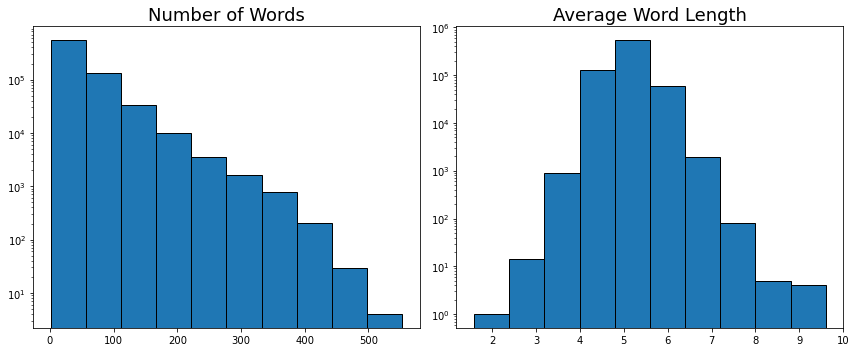

In [79]:
# compare distributions of features by class in order to find the
# features that can identify fraudulent transactions
fig, axes = plt.subplots(1, 2)  # generates figure and axis objects
fig.set_size_inches([12, 5])  # adjust the figure size in inches
axes = axes.flatten()
for feature, ax, title in zip([temp1, temp2], axes,
                              ['Number of Words', 'Average Word Length']):
    # plot the distribution of not helpful
    ax.hist(feature, edgecolor='k')
    ax.set_yscale('log')
    ax.set_title(title, size=18)
plt.tight_layout()
plt.show()

* The reviews are pretty clean but there are some words but the regular expression let the average word length to inflate.

# Cumulative Distribution of Words

In [80]:
# identify how many times appears a word in the corpus
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_fit = cv.fit_transform(df1.review_clean)
vocabulary_comprehensive = dict(zip(
    cv.get_feature_names(), list(np.asarray(cv_fit.sum(axis=0))[0])))

In [81]:
cv = CountVectorizer(min_df=0.03)
cv_fit = cv.fit_transform(df1.review_clean)
vocabulary_concise = dict(zip(
    cv.get_feature_names(), list(np.asarray(cv_fit.sum(axis=0))[0])))

In [82]:
print("""
        There are {:,} unique words in the corpus.
        {:,} of them, which accounts for {:.2f}% of all words, appear less than
        3% of the reviews.
      """
      .format(len(vocabulary_comprehensive),
              len(vocabulary_comprehensive) - len(vocabulary_concise),
              ((len(vocabulary_comprehensive) - len(vocabulary_concise)) /
                  len(vocabulary_comprehensive)) * 100))


        There are 100,857 unique words in the corpus.
        100,611 of them, which accounts for 99.76% of all words, appear less than
        3% of the reviews.
      


In [83]:
print('{:<15}\t{:<7}'.format('Term', 'Count'))
print('{0}\t{0}'.format('--------'))
for term, count in sorted([(word, count) for word, count in vocabulary_concise.items()], key=lambda x: x[1], reverse=True)[:20]:
    print('{:<15}\t{:,}'.format(term, count))

Term           	Count  
--------	--------
food           	535,503
good           	455,635
place          	437,241
great          	383,014
time           	314,294
order          	312,467
servic         	308,846
make           	228,978
back           	218,896
vega           	196,308
love           	195,117
wait           	194,598
restaur        	193,228
eat            	187,489
friend         	182,938
amaz           	152,153
delici         	150,732
nice           	148,207
tabl           	140,939
drink          	138,914


In [84]:
# add average user useful rating as a feature
temp = df1.loc[:, ['user_id', 'review_useful']]
temp = temp.groupby('user_id').mean().rename(
    columns={'review_useful':'average_useful_vote'})
df1 = df1.merge(temp, on='user_id', how='left')

In [85]:
# extract age of each review in days
from datetime import datetime
today = datetime(2020, 12, 15)

# extract days, weeks, months, and years info
df1.review_date = pd.to_datetime(df1.review_date)
df1['review_age_days'] = today - df1.review_date
df1.review_age_days = df1.review_age_days.apply(lambda x: x.days)

In [86]:
df1 = df1.loc[:, ['review', 'review_clean', 'review_stars', 'set_word', 'number_of_photos',
                'number_of_price', 'number_of_time', 'number_of_emots',
                'average_useful_vote', 'review_age_days', 'review_useful']]
df1.head()

,review,review_clean,review_stars,set_word,number_of_photos,number_of_price,number_of_time,number_of_emots,average_useful_vote,review_age_days,review_useful
0,"""River, we see that you haven't Yelped in a wh...",river yelp place vegetarian friend tail make f...,5.0,159,0,0,0,0,2.375,2157,6
1,Gave this restaurant 3 stars mostly because of...,give restaur star servic order spring roll ave...,3.0,133,0,0,1,5,0.000,2331,0
2,Oh boy! I love veggie restaurants! Especially ...,boy love veggi restaur asian influenc general ...,4.0,103,0,0,0,2,0.000,1245,0
3,This was my first vegan meal! I went with the ...,vegan meal familiar orang chicken legit miss c...,5.0,33,0,0,0,0,0.000,1417,0
4,Visited the Veggie House today. The atmosphe...,visit veggi hous today atmospher pleasant food...,5.0,72,0,0,0,1,0.000,1853,0


In [87]:
df1.describe()

,review_stars,set_word,number_of_photos,number_of_price,number_of_time,number_of_emots,average_useful_vote,review_age_days,review_useful
count,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000
mean,3.969877,78.156477,0.002595,0.217154,0.170730,0.494489,1.086698,1793.220615,1.086698
std,1.276400,56.223327,0.121116,0.720332,0.581196,1.184570,2.956909,1001.712885,3.532019
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,367.000000,-1.000000
25%,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,987.000000,0.000000
50%,4.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1621.000000,0.000000
75%,5.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2387.000000,1.000000
max,5.000000,498.000000,22.000000,25.000000,38.000000,56.000000,758.000000,5803.000000,758.000000


In [88]:
# there is a negative value in review useful. Let's check
df1.loc[df1.review_useful < 0]

,review,review_clean,review_stars,set_word,number_of_photos,number_of_price,number_of_time,number_of_emots,average_useful_vote,review_age_days,review_useful
633445,Cornish Pasty saved our Mothers Day! After hav...,cornish pasti save mother day leav restaur mak...,5.0,79,0,0,1,2,-0.5,1309,-1


In [89]:
# The negative sign also affects the average useful vote
# Turn them into positive
df1.review_useful = np.where(df1.review_useful < 0, 1, df1.review_useful)
df1.average_useful_vote = np.where(df1.average_useful_vote < 0, 0.5, df1.average_useful_vote)

In [90]:
df1.describe()

,review_stars,set_word,number_of_photos,number_of_price,number_of_time,number_of_emots,average_useful_vote,review_age_days,review_useful
count,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000,732562.000000
mean,3.969877,78.156477,0.002595,0.217154,0.170730,0.494489,1.086701,1793.220615,1.086701
std,1.276400,56.223327,0.121116,0.720332,0.581196,1.184570,2.956908,1001.712885,3.532018
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,367.000000,0.000000
25%,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,987.000000,0.000000
50%,4.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1621.000000,0.000000
75%,5.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2387.000000,1.000000
max,5.000000,498.000000,22.000000,25.000000,38.000000,56.000000,758.000000,5803.000000,758.000000


In [91]:
df1.to_csv('yelp_review_processed.csv', index=False)